
# Spotify and Youtube Data Analysis
---

<img src="https://github.com/Kodchalerk/EDA-Youtube-Spotify-Analysis/blob/main/pic/22Spotify-vs-Youtube22.jpg?raw=True" alt="Drawing" style="width: 600px;"/>

## About Dataset
---
Dataset of songs of various artist in the world and for each song is present:

Several statistics of the music version on spotify, including the number of streams;

Number of views of the official music video of the song on youtube.

## Column detail
---
The columns include 26 variables for each of the songs collected from spotify. These variables are briefly described next:

- Track: name of the song, as visible on the Spotify platform.

- Artist: name of the artist.

- Url_spotify: the Url of the artist.

- Album: the album in wich the song is contained on Spotify.

- Album_type: indicates if the song is relesead on Spotify as a single or contained in an album.

- Uri: a spotify link used to find the song through the API.

- Danceability: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- Energy: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- Key: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
Loudness: the overall loudness of a track in decibels (dB).

- Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary 
psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- Speechiness: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
Instrumentalness: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- Liveness: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- Tempo: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- Duration_ms: the duration of the track in milliseconds.

- Stream: number of streams of the song on Spotify.

- Url_youtube: url of the video linked to the song on Youtube, if it have any.

- Title: title of the videoclip on youtube.

- Channel: name of the channel that have published the video.

- Views: number of views.

- Likes: number of likes.

- Comments: number of comments.

- Description: description of the video on Youtube.

- Licensed: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.

- official_video: boolean value that indicates if the video found is the official video of the song.

***Notes***
These datas are heavily dependent on the time they were collected, which is in this case the 7th of February, 2023.

***Link to dataset*** : https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import re

# Data Overview and Cleaning
---

In [2]:
df = pd.read_csv('D:\zerotopandas\Spotify_Youtube.csv')
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.3560

In [3]:
# Generalize name of columns.
df.columns = [i.lower().replace(' ','') for i in df.columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed:0         20718 non-null  int64  
 1   artist            20718 non-null  object 
 2   url_spotify       20718 non-null  object 
 3   track             20718 non-null  object 
 4   album             20718 non-null  object 
 5   album_type        20718 non-null  object 
 6   uri               20718 non-null  object 
 7   danceability      20716 non-null  float64
 8   energy            20716 non-null  float64
 9   key               20716 non-null  float64
 10  loudness          20716 non-null  float64
 11  speechiness       20716 non-null  float64
 12  acousticness      20716 non-null  float64
 13  instrumentalness  20716 non-null  float64
 14  liveness          20716 non-null  float64
 15  valence           20716 non-null  float64
 16  tempo             20716 non-null  float6

In [5]:
def check_data(df):
    print('Data Info')
    print(df.info())
    print('----------')
    print('Check Null Values')
    print(df.isnull().sum())
    print('----------')
    print('Null Value Percentage')
    print(df.isnull().mean() * 100)    

In [6]:
check_data(df)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed:0         20718 non-null  int64  
 1   artist            20718 non-null  object 
 2   url_spotify       20718 non-null  object 
 3   track             20718 non-null  object 
 4   album             20718 non-null  object 
 5   album_type        20718 non-null  object 
 6   uri               20718 non-null  object 
 7   danceability      20716 non-null  float64
 8   energy            20716 non-null  float64
 9   key               20716 non-null  float64
 10  loudness          20716 non-null  float64
 11  speechiness       20716 non-null  float64
 12  acousticness      20716 non-null  float64
 13  instrumentalness  20716 non-null  float64
 14  liveness          20716 non-null  float64
 15  valence           20716 non-null  float64
 16  tempo             20716 non-nu

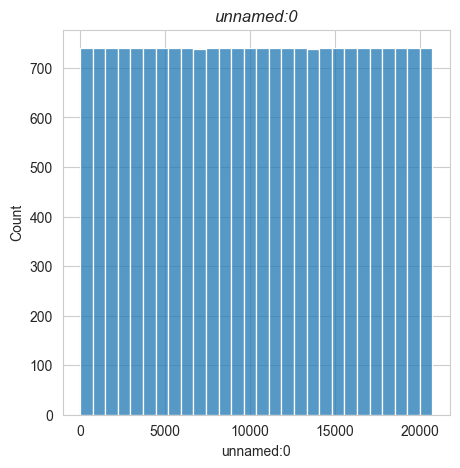

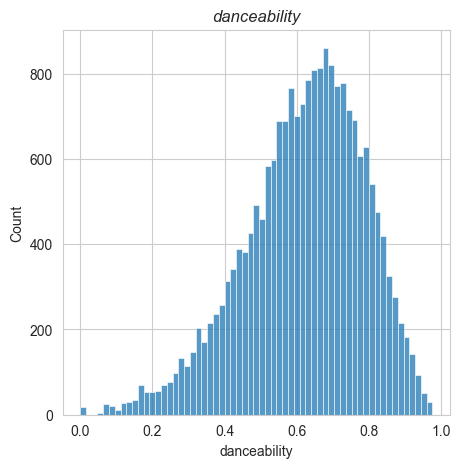

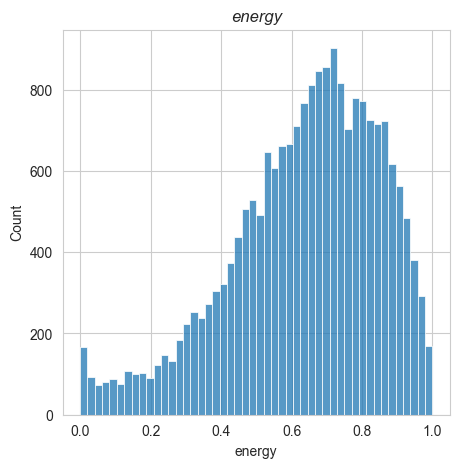

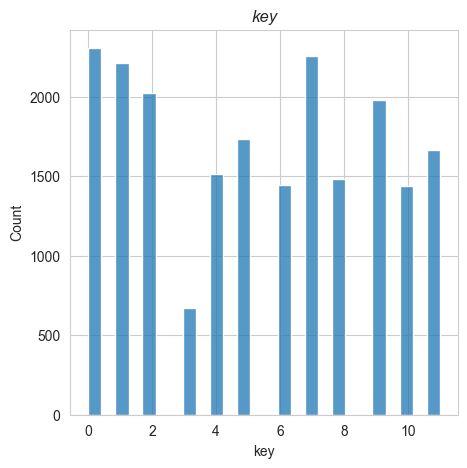

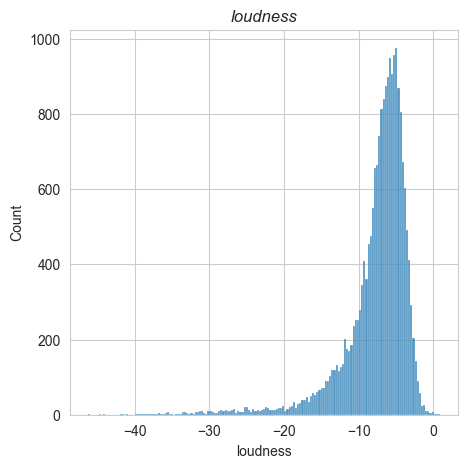

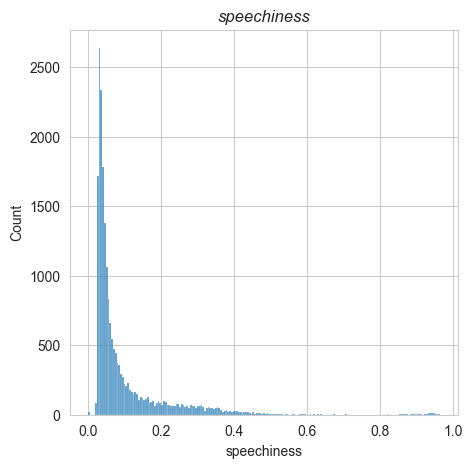

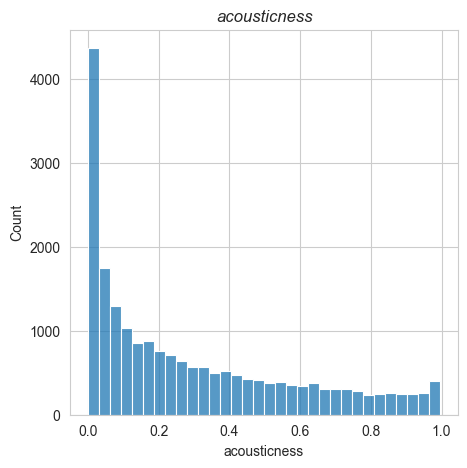

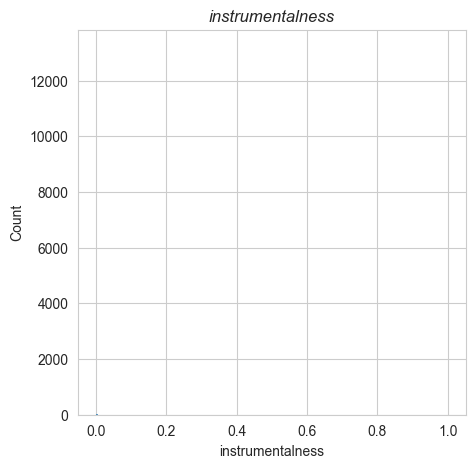

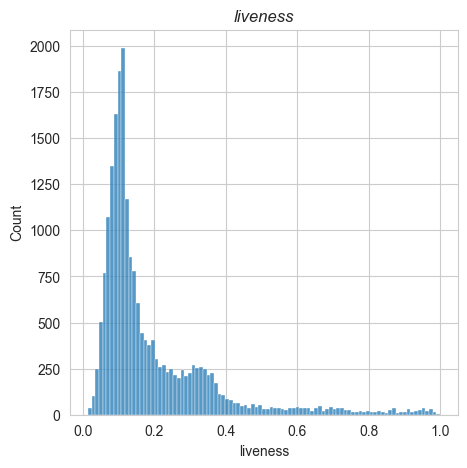

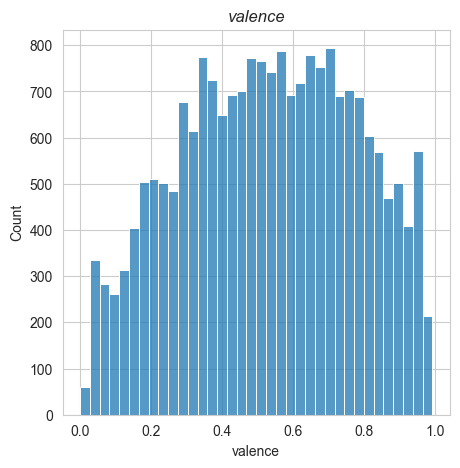

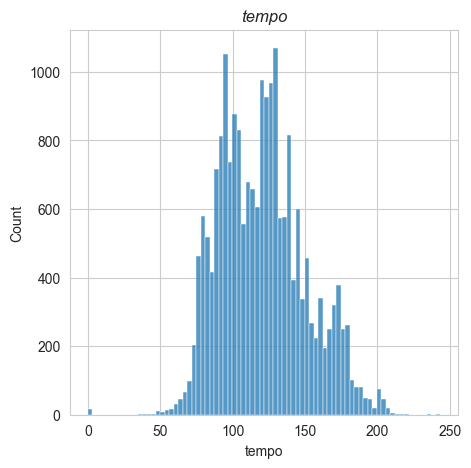

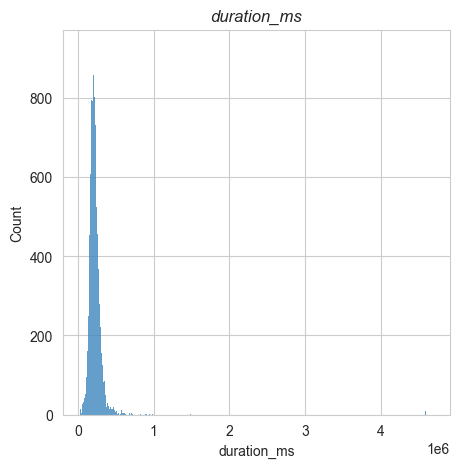

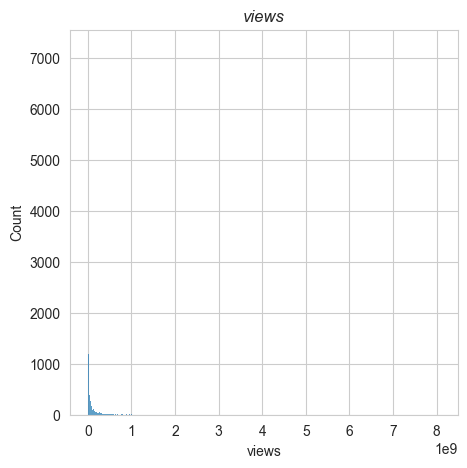

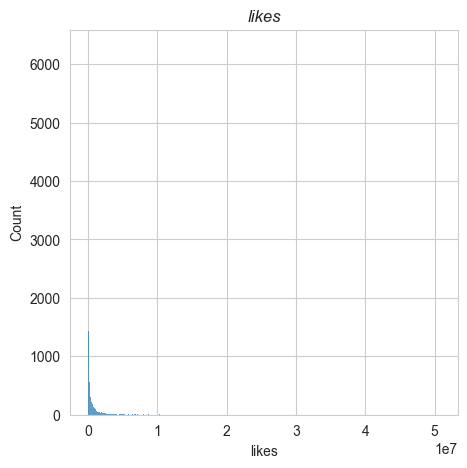

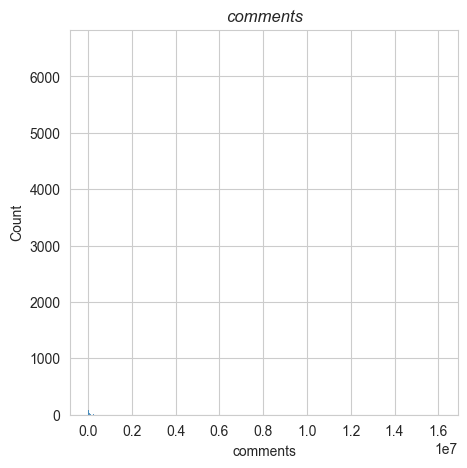

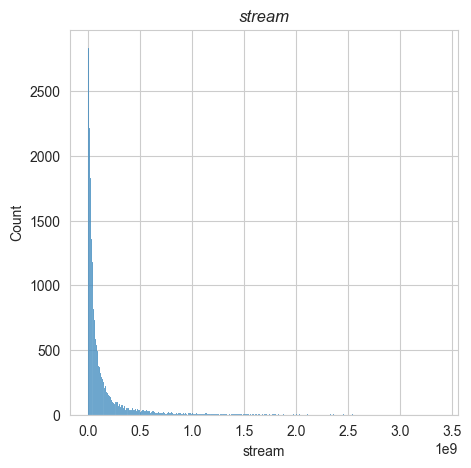

In [7]:
# Check numerical columns
df_num = list(df.select_dtypes(['float64' , 'int64']))

for i in df_num:
    plt.figure(figsize = (5,5))
    sns.histplot(data = df , x = df[i])
    plt.title(i , style='italic')
    plt.xlabel(i)

<Axes: xlabel='number_of_songs'>

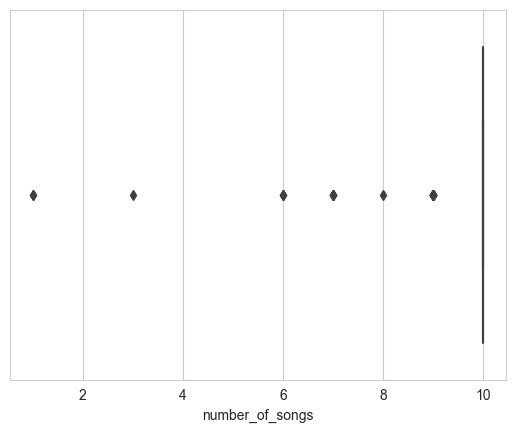

In [8]:
df_art = pd.DataFrame(df.artist)
df_art = df_art.groupby('artist').agg(number_of_songs = ('artist','count'))
df_art

sns.boxplot(x = df_art.number_of_songs)

In [9]:
df.select_dtypes('object')

,artist,url_spotify,track,album,album_type,uri,url_youtube,title,channel,description,licensed,official_video
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,Official HD Video for Gorillaz' fantastic trac...,True,True
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,The official video for Gorillaz - Rhinestone E...,True,True
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,The official music video for Gorillaz - Clint ...,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True
20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True
20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True
20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True


In [10]:
# Check some categorical columns
list_cat = list(df.select_dtypes('object'))
list_cat = ['album_type','licensed','official_video']
df['artist'] = df['artist'].str.replace('$','s')

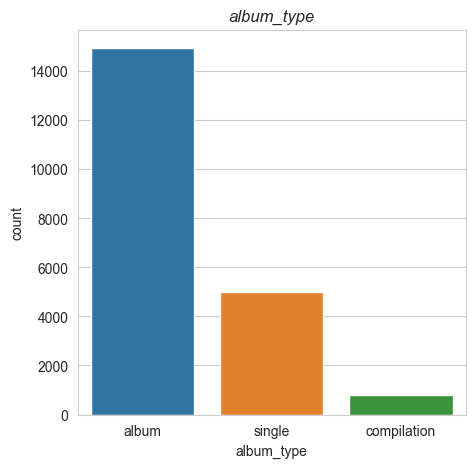

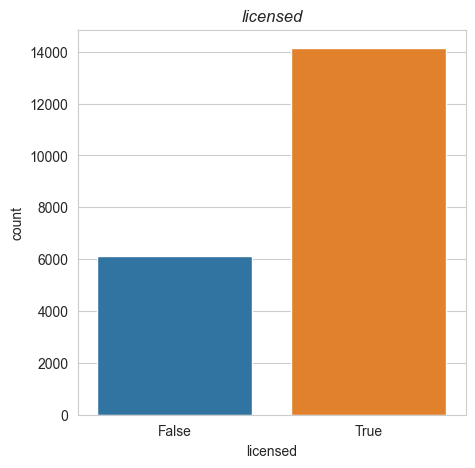

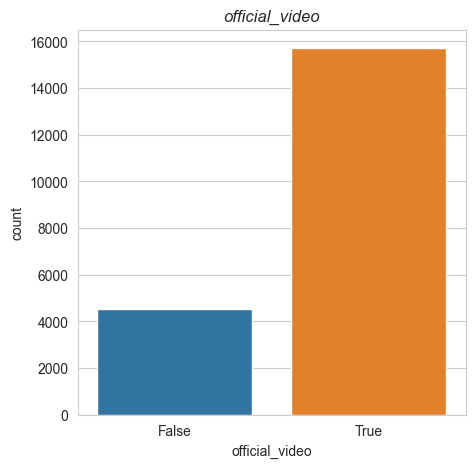

In [11]:
for i in list_cat:
    plt.figure(figsize = (5,5))
    sns.countplot(data = df , x = df[i])
    plt.title(i , style='italic')
    plt.xlabel(i)

In [12]:
#Check duplicated values
df.duplicated().sum()

0

In [13]:
# Drop missing values
df = df.dropna()

In [14]:
df.columns

Index(['unnamed:0', 'artist', 'url_spotify', 'track', 'album', 'album_type',
       'uri', 'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'url_youtube', 'title', 'channel', 'views', 'likes',
       'comments', 'description', 'licensed', 'official_video', 'stream'],
      dtype='object')

In [15]:
# Drop unused columns
df = df.drop(columns = ['unnamed:0','url_spotify','uri','url_youtube'])

In [16]:
# Copy Datafram
df1 = df.copy()

# Visualization

In [17]:
df1.head(5)

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


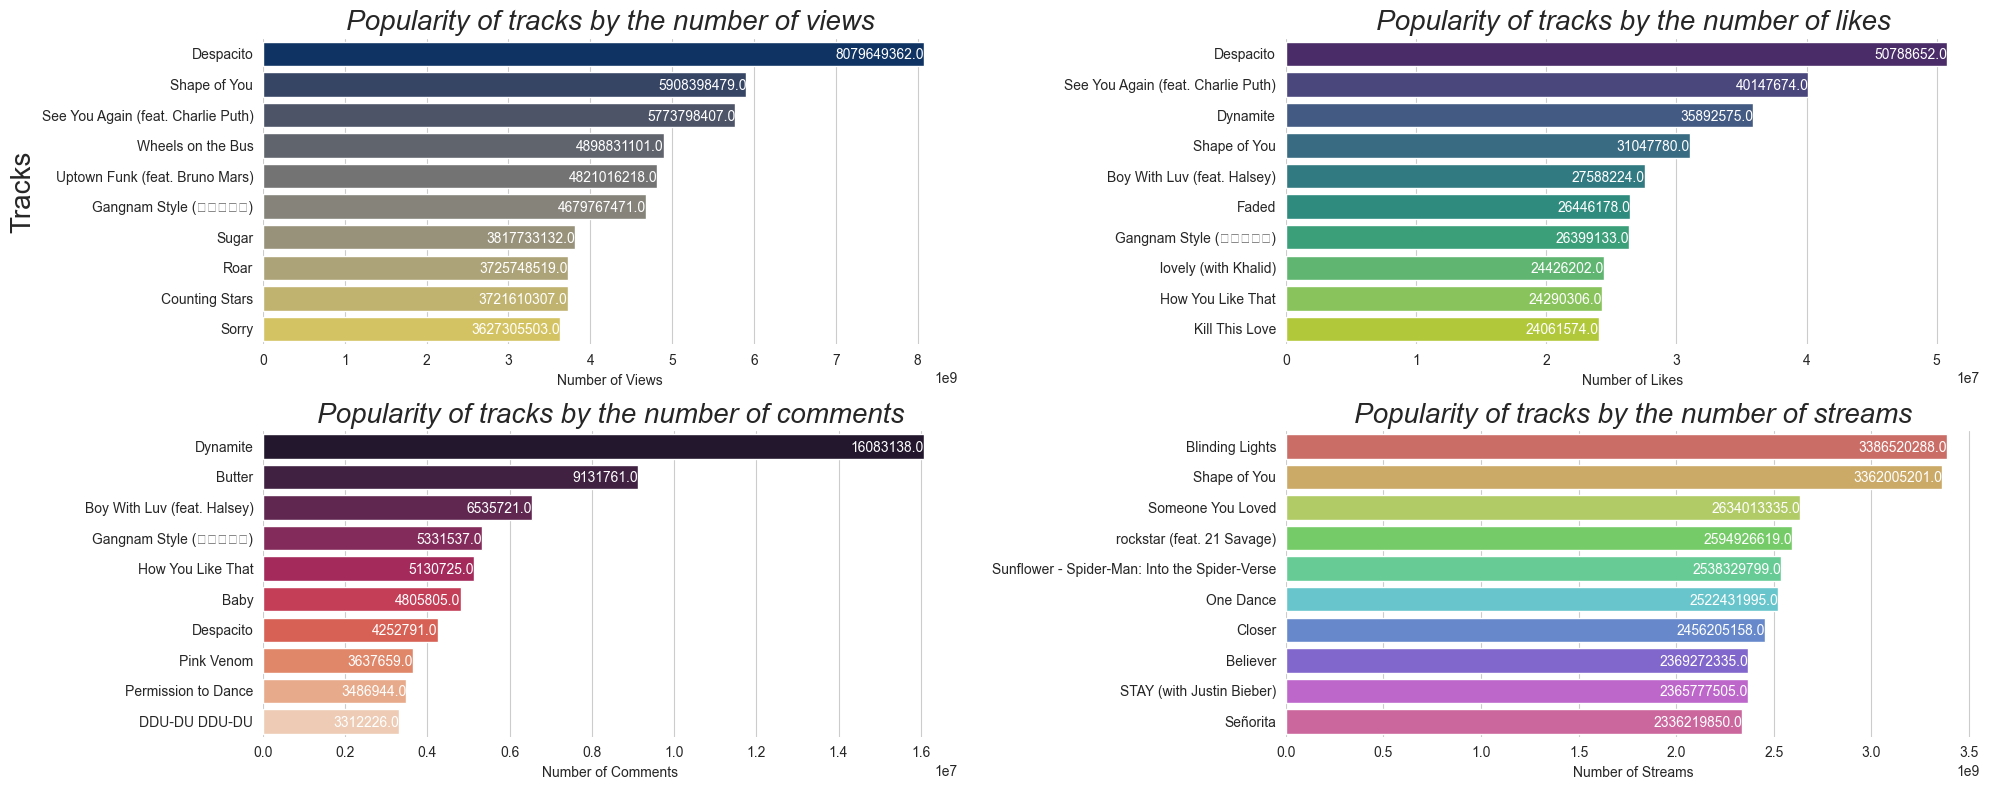

In [48]:
# The most views / likes / comments track
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(2,2,1)
df_view = df1.sort_values('views',ascending = False)[['track','views']].drop_duplicates(subset = ['track']).head(10)
ax = sns.barplot(data = df_view , y = 'track' , x = 'views' , palette = 'cividis')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Popularity of tracks by the number of views' , fontsize = 20 , style = 'italic')
ax.set_ylabel('Tracks' , fontsize = 20)
ax.set_xlabel('Number of Views')
for i,j in enumerate(df_view.views):
    ax.text(j,i,j , color="white", ha="right", va="center_baseline")

## ax2
ax2 = fig.add_subplot(2,2,2)
df_likes = df1.sort_values('likes',ascending = False)[['track','likes']].drop_duplicates(subset = ['track']).head(10)
ax2 = sns.barplot(data = df_likes , y = 'track' , x = 'likes' , palette = 'viridis')
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Popularity of tracks by the number of likes' , fontsize = 20 , style = 'italic')
ax2.set_ylabel(' ')
ax2.set_xlabel('Number of Likes')
for i,j in enumerate(df_likes.likes):
    ax2.text(j,i,j , color="white", ha="right", va="center_baseline")
    
## ax3
ax3 = fig.add_subplot(2,2,3)
df_comments = df1.sort_values('comments',ascending = False)[['track','comments']].drop_duplicates(subset = ['track']).head(10)
ax3 = sns.barplot(data = df_comments , y = 'track' , x = 'comments' , palette = 'rocket')
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Popularity of tracks by the number of comments', fontsize = 20 , style = 'italic')
ax3.set_ylabel(' ')
ax3.set_xlabel('Number of Comments')
for i,j in enumerate(df_comments.comments):
    ax3.text(j,i,j , color="white", ha="right", va="center_baseline")

ax4 = fig.add_subplot(2,2,4)
df_stream = df1.sort_values('stream',ascending = False)[['track','stream']].drop_duplicates(subset = ['track']).head(10)
ax4 = sns.barplot(data = df_stream , y = 'track' , x = 'stream' , palette = 'hls')
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Popularity of tracks by the number of streams', fontsize = 20 , style = 'italic')
ax4.set_ylabel(' ')
ax4.set_xlabel('Number of Streams')
for i,j in enumerate(df_stream.stream):
    ax4.text(j,i,j , color="white", ha="right", va="center_baseline")
##
plt.tight_layout()

In [41]:
for i,j in enumerate(df_view.views):
    print(i)
    print(j)

0
8079649362.0
1
5908398479.0
2
5773798407.0
3
4898831101.0
4
4821016218.0
5
4679767471.0
6
3817733132.0
7
3725748519.0
8
3721610307.0
9
3627305503.0


In [19]:
# Extreme track
df_extreme = ['danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms','stream']

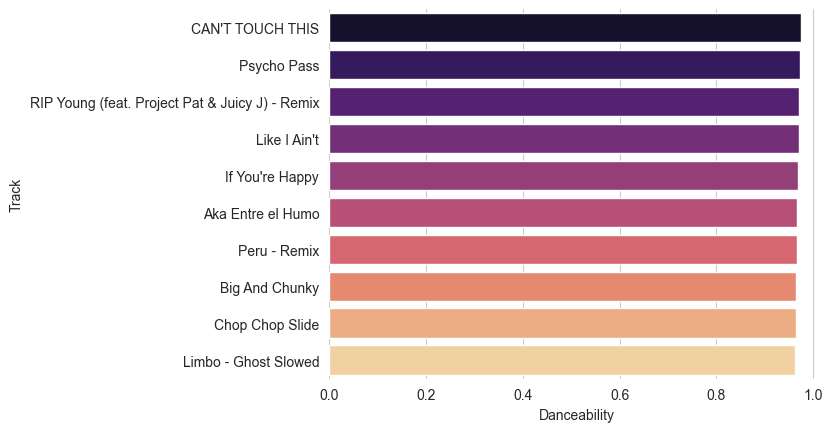

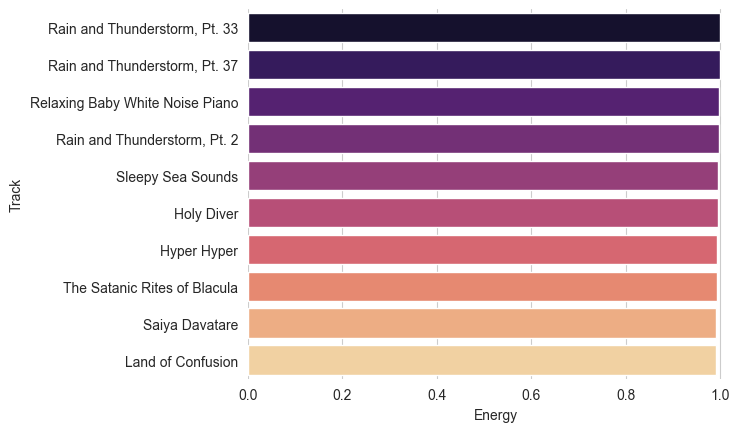

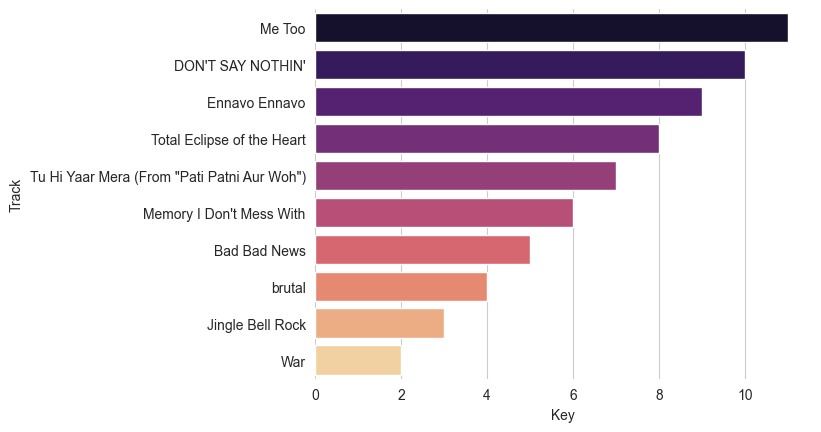

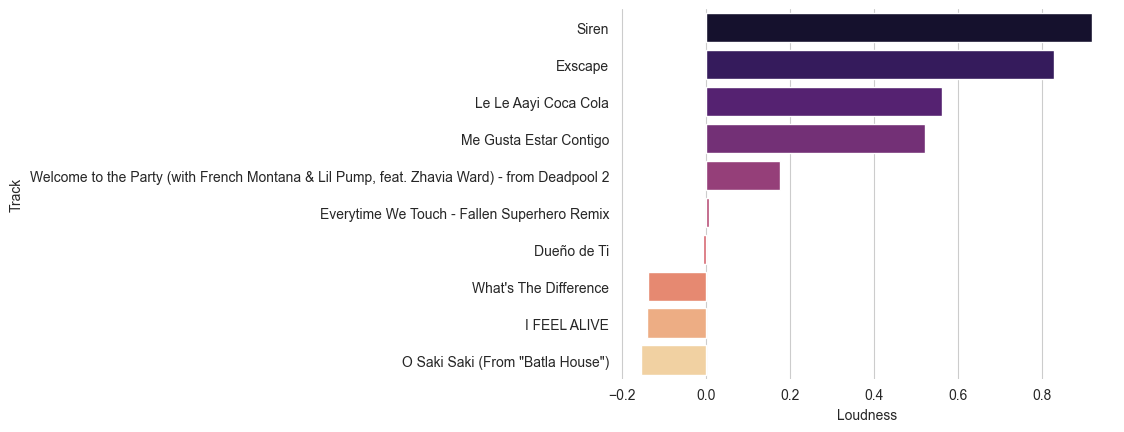

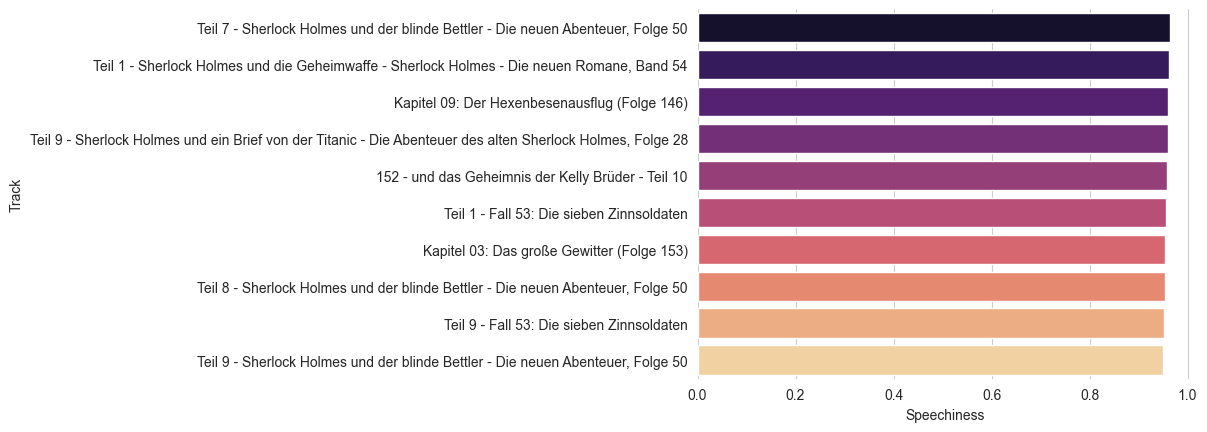

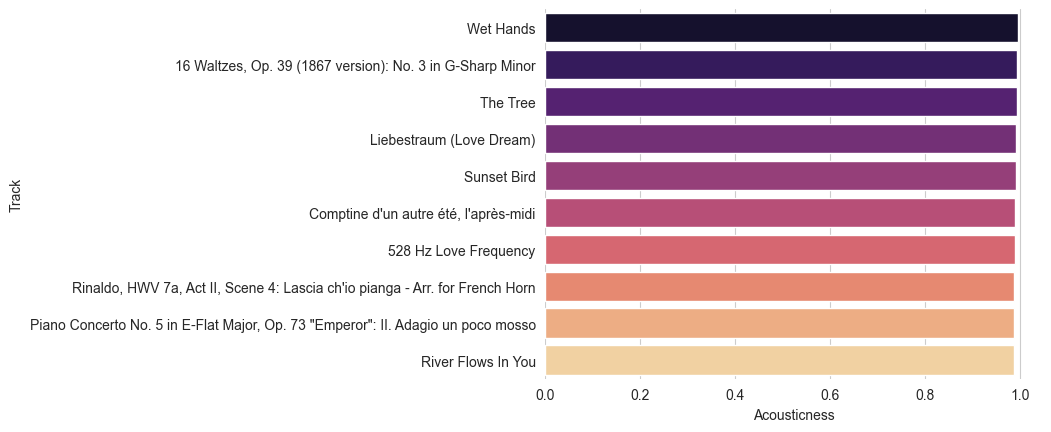

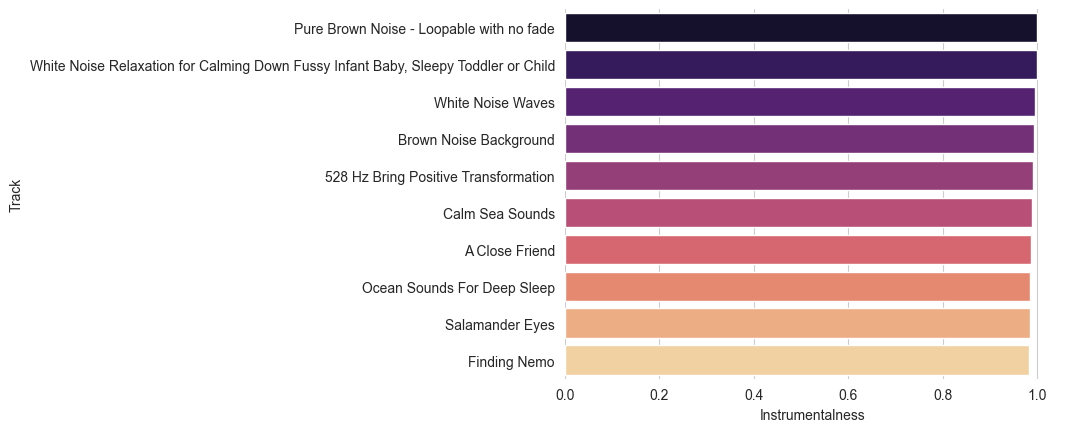

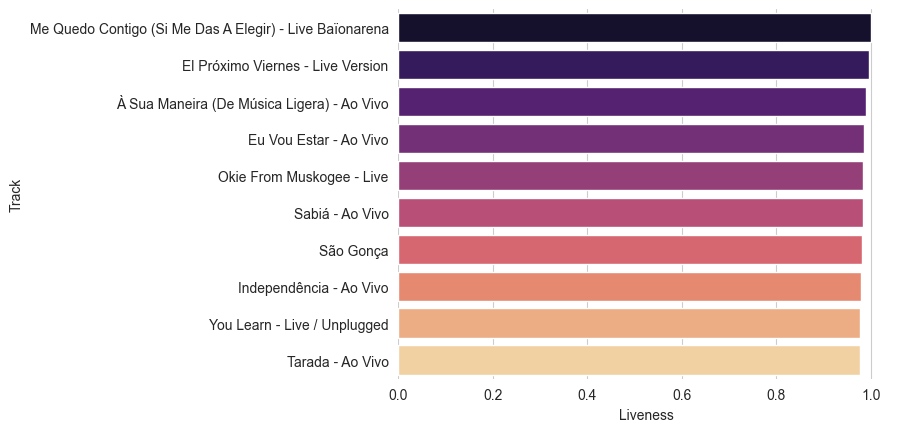

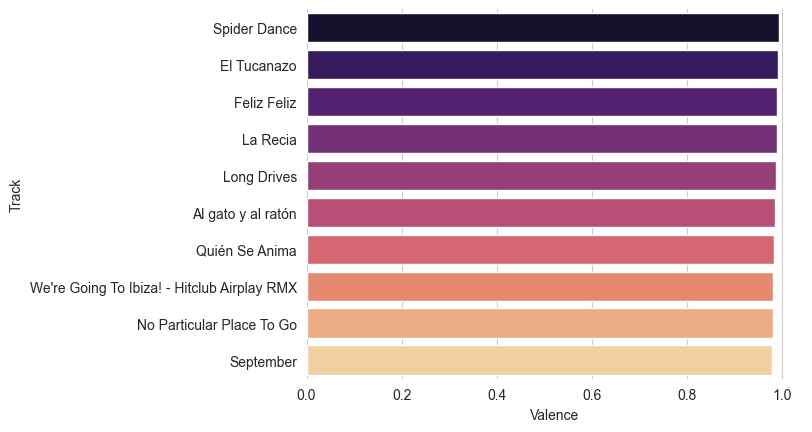

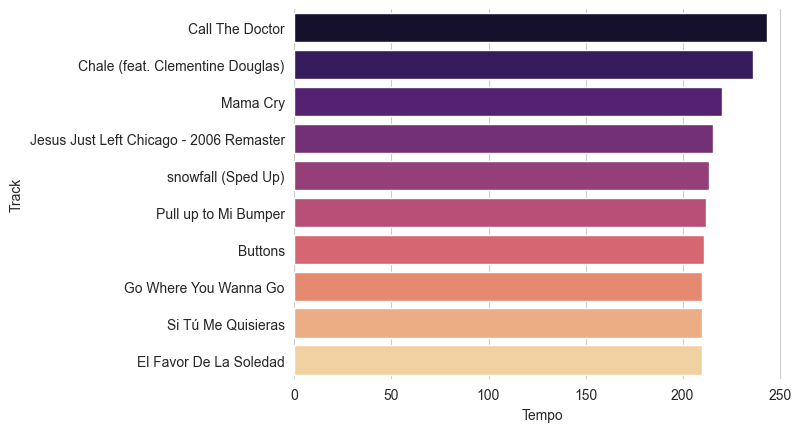

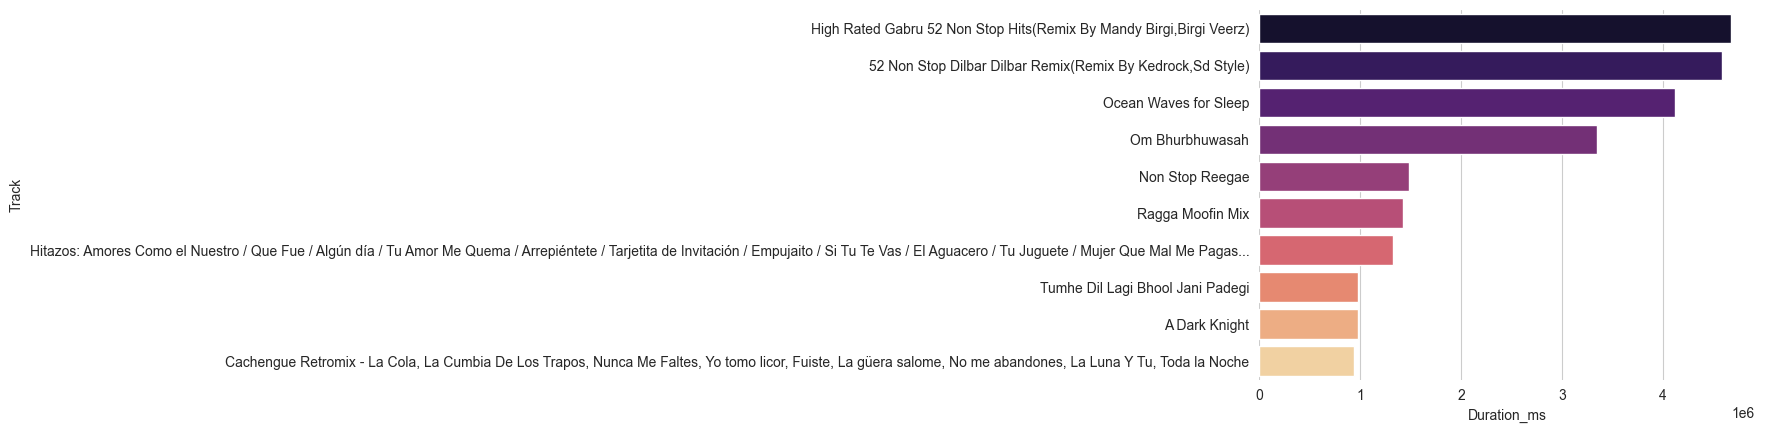

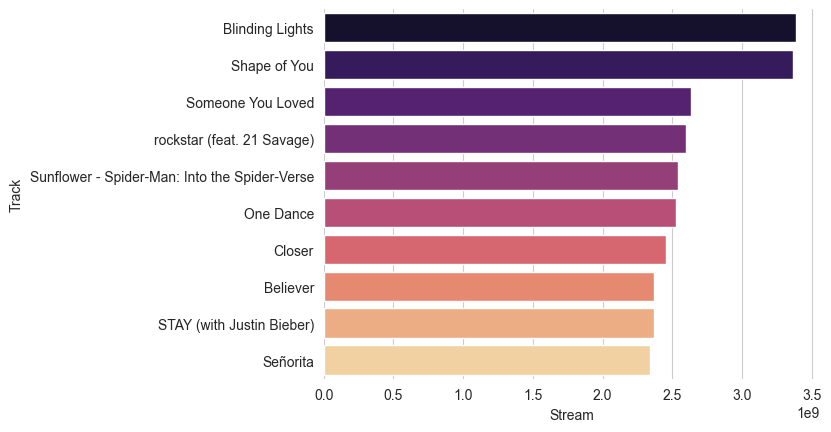

In [59]:
for i in df_extreme:
    dfx = df1[['track',i]].sort_values(i , ascending = False).drop_duplicates(subset = i).head(10)
    sns.barplot(data = dfx , x = i , y = 'track' , palette = 'magma')
    plt.ylabel('Track')
    plt.xlabel(i.capitalize())
    sns.despine(right = True, left = True , bottom = True)
    plt.tight_layout
    plt.show()

In [34]:
num_views = df1.groupby('artist').agg(total = ('views','sum')).reset_index()
num_views = num_views.sort_values('total', ascending = False).head(10)
########
num_likes = df1.groupby('artist').agg(total = ('likes','sum')).reset_index()
num_likes = num_likes.sort_values('total',ascending = False).head(10)
########
num_comments = df1.groupby('artist').agg(total = ('comments','sum')).reset_index()
num_comments = num_comments.sort_values('total',ascending = False).head(10)
########
num_stream = df1.groupby('artist').agg(total = ('stream','sum')).reset_index()
num_stream = num_stream.sort_values('total',ascending = False).head(10)

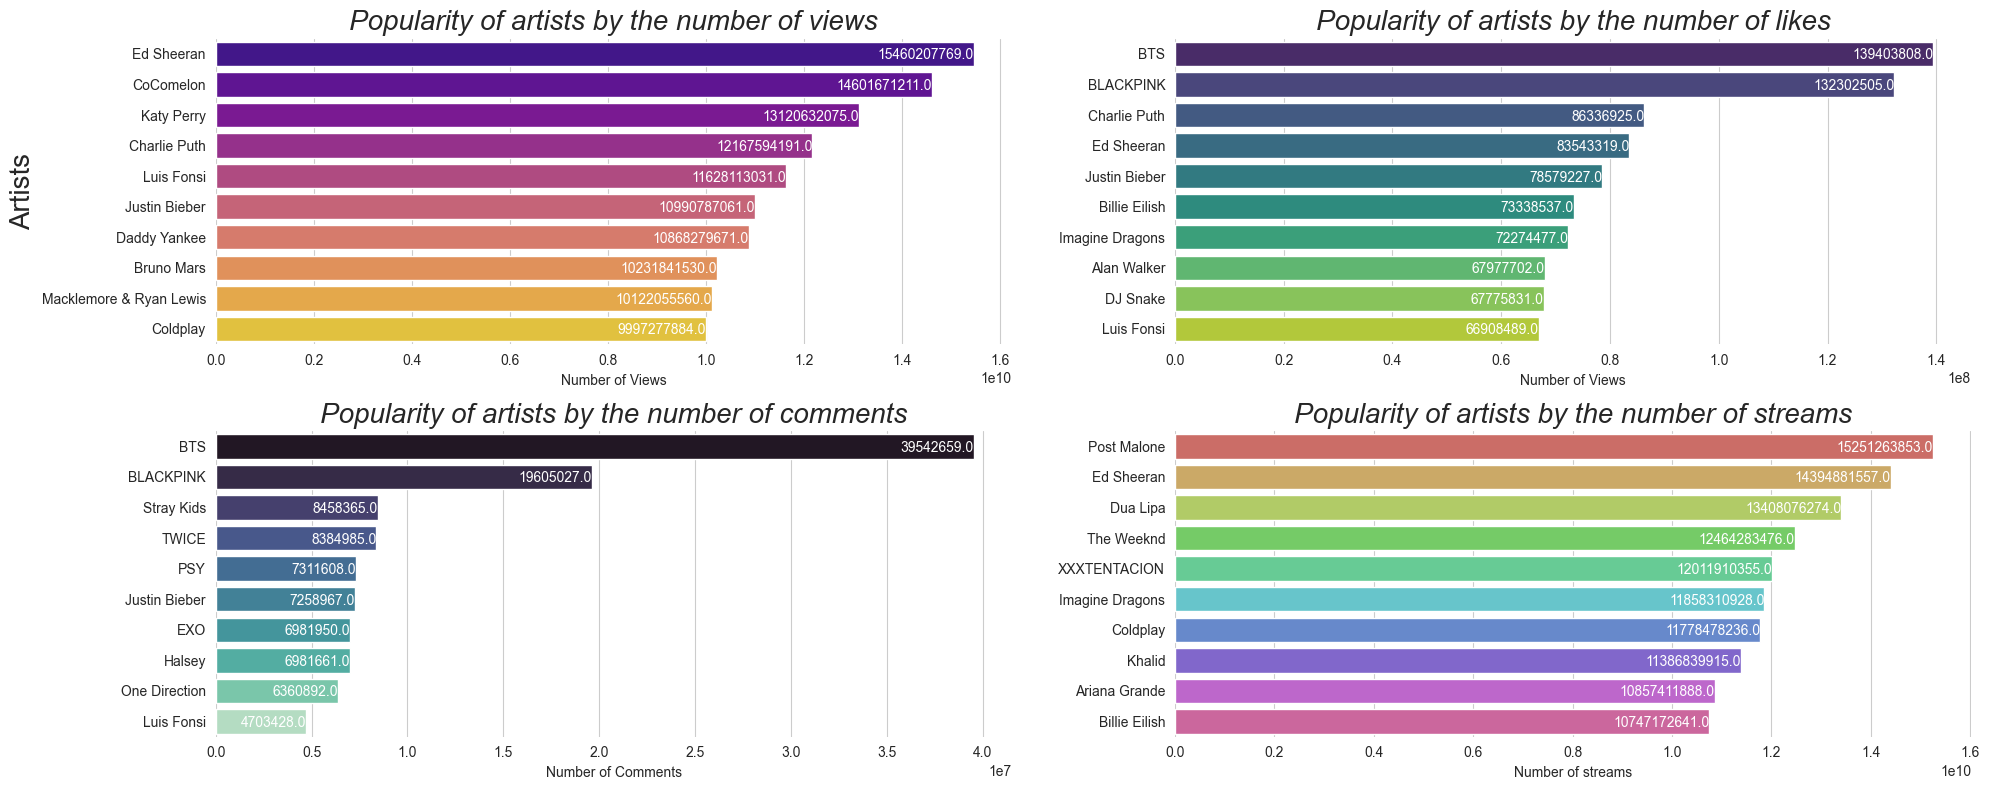

In [58]:
#artist with the most likes , views , comments
fig = plt.figure(figsize = (20,8))
# Ax1
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(data = num_views, x = 'total' , y = 'artist' , palette = 'plasma')
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Popularity of artists by the number of views' , fontsize = 20 , style = 'italic')
ax1.set_ylabel('Artists' , fontsize = 20)
ax1.set_xlabel('Number of Views')
for i,j in enumerate(num_views.total):
    ax1.text(j,i,j , color="white", ha="right", va="center_baseline")

# Ax2
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(data = num_likes, x = 'total' , y = 'artist' , palette = 'viridis')
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Popularity of artists by the number of likes' , fontsize = 20 , style = 'italic')
ax2.set_ylabel(' ')
ax2.set_xlabel('Number of Views')
for i,j in enumerate(num_likes.total):
    ax2.text(j,i,j , color="white", ha="right", va="center_baseline")
    
# Ax3
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(data = num_comments, x = 'total' , y = 'artist' , palette = 'mako')
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Popularity of artists by the number of comments' , fontsize = 20 , style = 'italic')
ax3.set_ylabel('Tracks' , fontsize = 20)
ax3.set_xlabel('Number of Comments')
ax3.set_ylabel(' ')
for i,j in enumerate(num_comments.total):
    ax3.text(j,i,j , color="white", ha="right", va="center_baseline")

# Ax4
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(data = num_stream, x = 'total' , y = 'artist' , palette = 'hls')
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Popularity of artists by the number of streams' , fontsize = 20 , style = 'italic')
ax4.set_ylabel('Tracks' , fontsize = 20)
ax4.set_xlabel('Number of streams')
ax4.set_ylabel(' ')
for i,j in enumerate(num_stream.total):
    ax4.text(j,i,j , color="white", ha="right", va="center_baseline")

############
plt.tight_layout()

In [23]:
df1

,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,SICK LEGEND,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,SICK LEGEND,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,SICK LEGEND,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06
